### USED CARS DATASET

Over a million and a half unique car postings between the months of September and November of 2018 (Craiglist)

Data source: https://www.kaggle.com/austinreese/craigslist-carstrucks-data



### Importing needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#import geopandas as gpd

#import squarify

pd.set_option('display.max_columns', 100) #to see all colummns of Df

### Reading file

In [2]:
df = pd.read_csv('craigslistVehiclesFull.csv')

### Exploring data

In [3]:
df.head(10)

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,automatic,NaN,rwd,NaN,coupe,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.477500,-96.704100,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.761200,-96.690700,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.141500,-103.205200,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,1FAFP55UO4G113464,fwd,full-size,sedan,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.284500,-95.593000,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.026100,-94.406400,19109.0,Kossuth,19.0,IA,Iowa,47.0
5,https://marshall.craigslist.org/ctd/d/2007-gmc...,marshall,9900,2007.0,gmc,yukon,good,8 cylinders,gas,169000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_hFLz9hAHi0...,43.328149,-96.774445,46083.0,Lincoln,46.0,SD,South Dakota,38.0
6,https://marshall.craigslist.org/cto/d/2015-jee...,marshall,12500,2015.0,jeep,patriot high altitude,like new,4 cylinders,gas,39500.0,rebuilt,automatic,NaN,4wd,sub-compact,SUV,grey,https://images.craigslist.org/00404_RsUm4vwrGV...,43.548600,-96.633200,46099.0,Minnehaha,46.0,SD,South Dakota,38.0
7,https://marshall.craigslist.org/ctd/d/2008-bmw...,marshall,3900,2008.0,bmw,3 series,NaN,NaN,gas,0.0,clean,NaN,WBAVA37508NL47474,NaN,NaN,NaN,NaN,https://images.craigslist.org/00202_8ciATrWst3...,41.622572,-87.632656,17031.0,Cook,17.0,IL,Illinois,48.0
8,https://soo.craigslist.ca/cto/d/ebike-red-zone...,soo,2700,2018.0,NaN,Ebike,excellent,NaN,electric,NaN,clean,other,NaN,NaN,mid-size,NaN,red,https://images.craigslist.org/01111_7YfxuQ9Nxu...,46.509803,-84.257825,NaN,NaN,NaN,NaN,FAILED,NaN
9,https://soo.craigslist.ca/ctd/d/2003-ford-excu...,soo,12995,2003.0,ford,excursion,excellent,10 cylinders,gas,236000.0,clean,automatic,1FMNU41S43EB95265,4wd,NaN,SUV,blue,https://images.craigslist.org/00707_97tX51ryfc...,46.514191,-84.291307,NaN,NaN,NaN,NaN,FAILED,NaN


### Keeping only needed data
I consider to be needed for my analysis

In [4]:
df = df[['city','price','year','manufacturer','cylinders','fuel','odometer','transmission','paint_color','county_name','state_name' ]]
df.head()

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name
0,marshall,11900,2010.0,dodge,6 cylinders,gas,43600.0,automatic,red,Lincoln,South Dakota
1,marshall,1515,1999.0,NaN,NaN,gas,NaN,other,NaN,Deuel,South Dakota
2,marshall,17550,2008.0,ford,NaN,gas,NaN,automatic,NaN,Meade,South Dakota
3,marshall,2800,2004.0,ford,6 cylinders,gas,168591.0,automatic,grey,Osceola,Iowa
4,marshall,400,2001.0,NaN,NaN,gas,217000.0,automatic,NaN,Kossuth,Iowa


### What are date types of this df?

In [5]:
df.dtypes

city             object
price             int64
year            float64
manufacturer     object
cylinders        object
fuel             object
odometer        float64
transmission     object
paint_color      object
county_name      object
state_name       object
dtype: object

- Most data is categorical, nominal (City, Manufacturer, Transmission, cylinders,paint_color, county_name, state_name)
- The rest is numumerical, continuous (Price, Year, Odometer)

### How big is dataset?

In [6]:
df.shape

(1723065, 11)

### 1,723,065 cars

### Checking for missing data?

In [7]:
df.isnull().sum()

city                 0
price                0
year              6315
manufacturer    136414
cylinders       691291
fuel             10367
odometer        564054
transmission      9022
paint_color     695650
county_name      58833
state_name           0
dtype: int64

### What to do with missing values?

In [8]:
df = df.dropna(subset=['year','manufacturer'])

In [9]:
df.shape

(1581344, 11)

Removed instances with missing values of Year & Manufacturer. Why? Because this data is crucial in predicting price of car

#### Dataset of 1,581,344 cars left

### Removing duplicates if any? Any Corrupted Data?

In [10]:
df[df.duplicated(['city','price','year','odometer','manufacturer','cylinders','transmission','paint_color','county_name','state_name'])]

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name
85,whistler,26880,2016.0,chrysler,NaN,gas,49000.0,automatic,NaN,NaN,FAILED
87,whistler,17990,2010.0,toyota,NaN,hybrid,117000.0,automatic,NaN,NaN,FAILED
88,whistler,15890,2010.0,audi,NaN,gas,188000.0,automatic,NaN,NaN,FAILED
90,whistler,8800,2007.0,nissan,NaN,gas,163000.0,automatic,NaN,NaN,FAILED
93,whistler,13890,2014.0,subaru,NaN,gas,78000.0,automatic,NaN,NaN,FAILED
95,whistler,18990,2010.0,audi,NaN,gas,152000.0,automatic,NaN,NaN,FAILED
232,hat,41989,2016.0,gmc,8 cylinders,gas,49243.0,automatic,silver,NaN,FAILED
264,nd,1000,2006.0,acura,NaN,gas,NaN,automatic,NaN,McLean,North Dakota
291,nd,13000,2011.0,honda,NaN,gas,NaN,automatic,NaN,Mountrail,North Dakota
335,csd,24900,1967.0,chevy,NaN,gas,NaN,manual,NaN,Kendall,Illinois


Are these duplicate values? Drop duplicates

In [11]:
df.shape

(1581344, 11)

In [12]:
df.drop_duplicates()

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name
0,marshall,11900,2010.0,dodge,6 cylinders,gas,43600.0,automatic,red,Lincoln,South Dakota
2,marshall,17550,2008.0,ford,NaN,gas,NaN,automatic,NaN,Meade,South Dakota
3,marshall,2800,2004.0,ford,6 cylinders,gas,168591.0,automatic,grey,Osceola,Iowa
5,marshall,9900,2007.0,gmc,8 cylinders,gas,169000.0,automatic,NaN,Lincoln,South Dakota
6,marshall,12500,2015.0,jeep,4 cylinders,gas,39500.0,automatic,grey,Minnehaha,South Dakota
7,marshall,3900,2008.0,bmw,NaN,gas,0.0,NaN,NaN,Cook,Illinois
9,soo,12995,2003.0,ford,10 cylinders,gas,236000.0,automatic,blue,NaN,FAILED
10,soo,4000,2006.0,chev,6 cylinders,gas,138000.0,automatic,white,NaN,FAILED
11,soo,13000,2002.0,chevrolet,8 cylinders,diesel,350000.0,automatic,white,NaN,FAILED
12,soo,21695,2016.0,hyundai,4 cylinders,gas,44814.0,other,white,NaN,FAILED


In [13]:
# 220021 values removed

### Renaming some labels 

In [14]:
df['manufacturer'].unique()

array(['dodge', 'ford', 'gmc', 'jeep', 'bmw', 'chev', 'chevrolet',
       'hyundai', 'honda', 'ram', 'acura', 'kia', 'volkswagen', 'nissan',
       'audi', 'mercedes-benz', 'subaru', 'chrysler', 'toyota', 'rover',
       'mazda', 'chevy', 'cadillac', 'mercedes', 'infiniti', 'lexus',
       'mini', 'saturn', 'vw', 'lincoln', 'mitsubishi', 'buick',
       'mercury', 'fiat', 'pontiac', 'volvo', 'jaguar', 'datsun',
       'infinity', 'ferrari', 'harley', 'alfa', 'porche', 'noble',
       'land rover', 'landrover', 'harley-davidson', 'alfa-romeo',
       'mercedesbenz', 'aston', 'aston-martin', 'morgan', 'hennessey'],
      dtype=object)

In [15]:
df['manufacturer'] = df['manufacturer'].replace({'chev': 'chevrolet', 
                                                 'vw': 'volkswagen', 'infinity': 'infiniti', 
                                                 'land rover': 'rover', 'landrover':'rover',
                                                'aston':'aston-martin', 'mercedesbenz':'mercedes-benz',
                                                 'mercedes':'mercedes-benz','alfa':'alfa-romeo','chevy':'chevrolet'
                                                })

In [16]:
df['manufacturer'].unique()

array(['dodge', 'ford', 'gmc', 'jeep', 'bmw', 'chevrolet', 'hyundai',
       'honda', 'ram', 'acura', 'kia', 'volkswagen', 'nissan', 'audi',
       'mercedes-benz', 'subaru', 'chrysler', 'toyota', 'rover', 'mazda',
       'cadillac', 'infiniti', 'lexus', 'mini', 'saturn', 'lincoln',
       'mitsubishi', 'buick', 'mercury', 'fiat', 'pontiac', 'volvo',
       'jaguar', 'datsun', 'ferrari', 'harley', 'alfa-romeo', 'porche',
       'noble', 'harley-davidson', 'aston-martin', 'morgan', 'hennessey'],
      dtype=object)

In [17]:
df.drop( df[ df['manufacturer'] == 'harley'].index , inplace=True)
#Harley is not a car

In [18]:
df.drop( df[ df['manufacturer'] == 'harley-davidson'].index , inplace=True)
#Harley-davidson is not a car

In [19]:
df.shape

(1580504, 11)

## Explorig numerical data Years & Price 

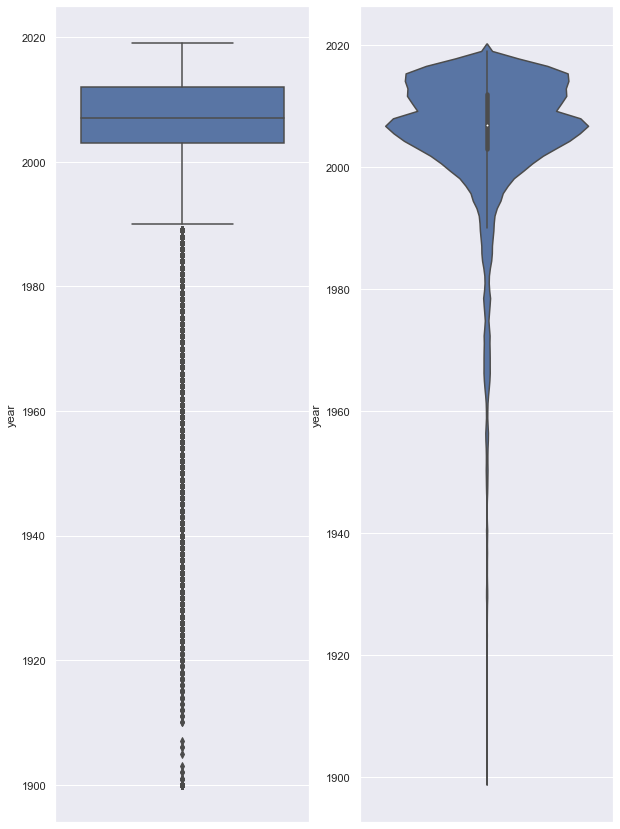

In [20]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
sns.boxplot(y='year', data=df)
plt.subplot(1,2,2)
sns.violinplot(y='year', data=df)

Seems worth to get rid of cars older than 1960

### Removing cars older than 1960 

In [21]:
df = df[df['year'] > 1960] #Keeping only cars older than 1960 make

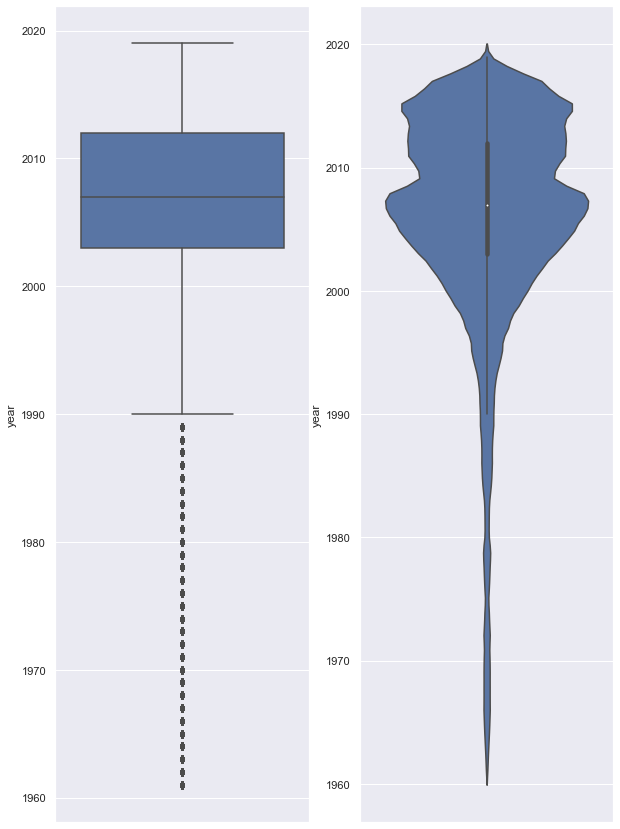

In [22]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
sns.boxplot(y='year', data=df)
plt.subplot(1,2,2)
sns.violinplot(y='year', data=df)

In [23]:
df.shape

(1562661, 11)

#### 1,562,563 Cars left in dataset

## Price range illustration using Boxplot

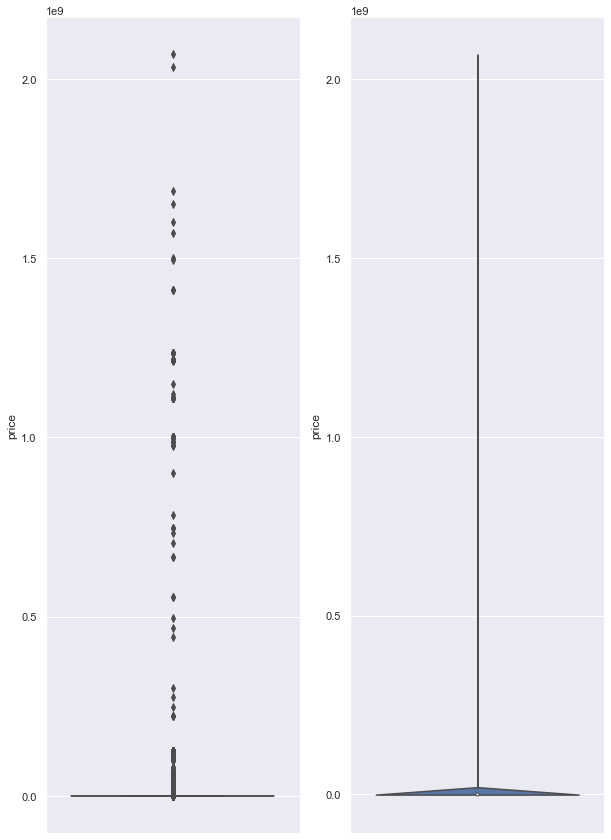

In [24]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
sns.boxplot(y='price', data=df, ) #showfliers=False
plt.subplot(1,2,2)
sns.violinplot(y='price', data=df, ) #showfliers=False

Seems too many outliers, reducing size to keep only cars < $500,000

In [25]:
#Getting rid of outlicers above 500,000$ 
df = df[df['price'] < 500000]

In [26]:
df.shape

(1562052, 11)

### Price range of cars below $500,000

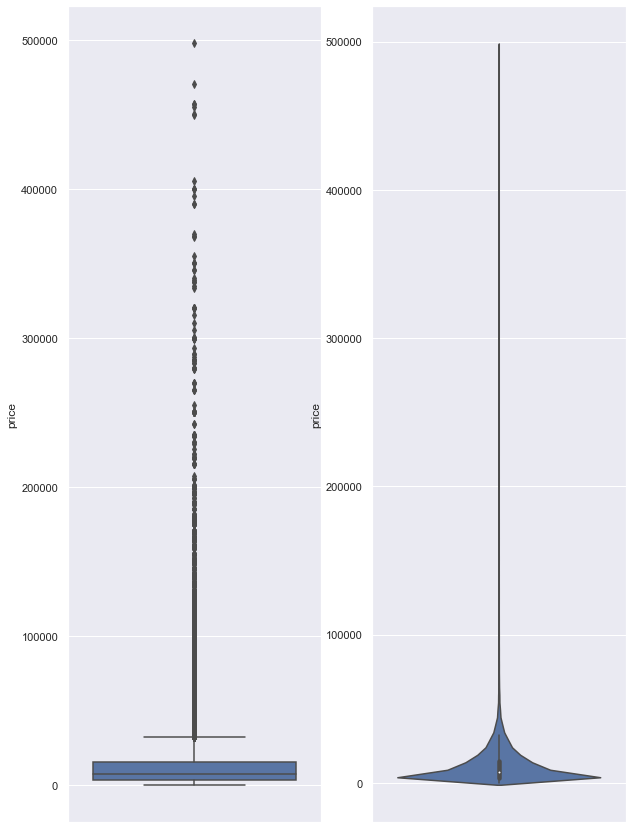

In [27]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
sns.boxplot(y='price', data=df, ) #showfliers=False ) 
plt.subplot(1,2,2)
sns.violinplot(y='price', data=df,) #showfliers=False) 

In [28]:
df.shape

(1562052, 11)

Still seems to be too many outliers, will keep only cars below $100,000

In [29]:
df = df[df['price'] < 100000] #Keeping only cars older than 1960 make
df.shape

(1560848, 11)

### Price range of cars below $100,000

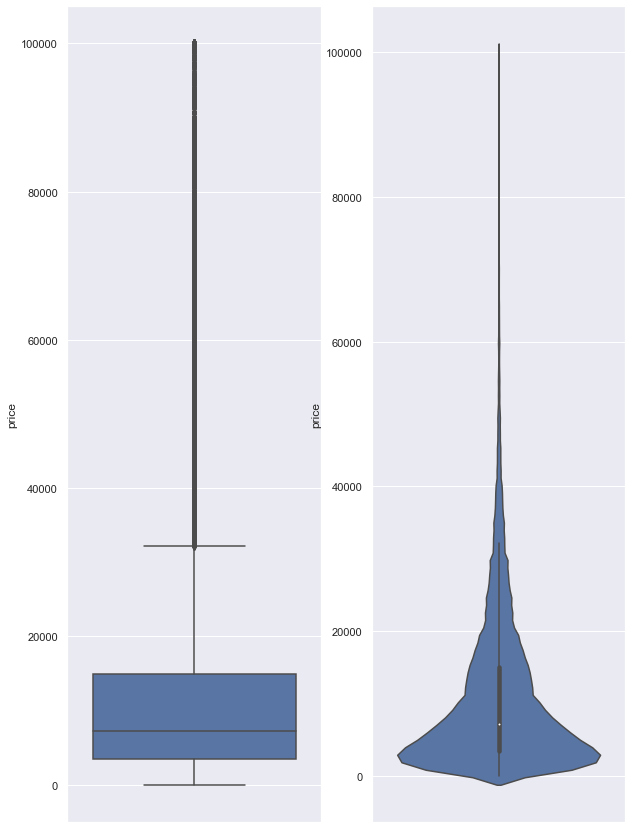

In [30]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
sns.boxplot(y='price', data=df, ) #showfliers=False ) 
plt.subplot(1,2,2)
sns.violinplot(y='price', data=df,) #showfliers=False) 

### Cars quantities by city

In [31]:
cities = df['city'].value_counts()

In [32]:
cities.count()

469

Text(0.5, 1.0, 'Used cars for sale by City, US')

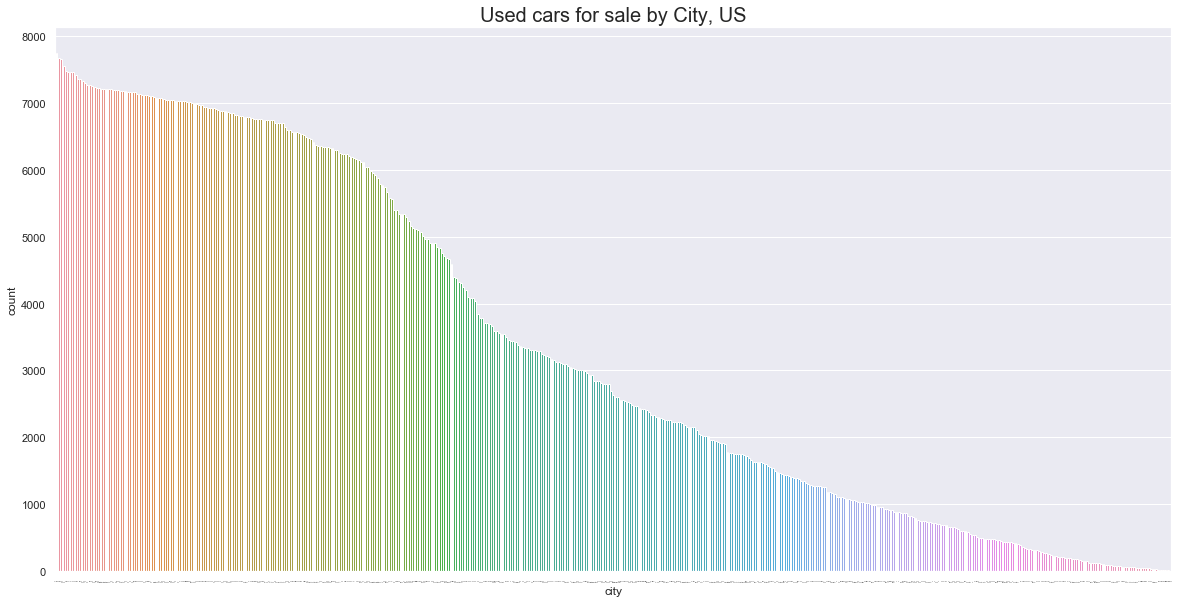

In [33]:
plt.figure(figsize=(20,10))
#sns.countplot(cities)
ax = sns.countplot(x='city',data=df,order=df['city'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), fontsize=0);
ax.set_title('Used cars for sale by City, US', fontsize=20)

### Top 10 cities with most cars

In [34]:
cities.head(10)

cosprings      7749
grandrapids    7671
anchorage      7662
sacramento     7559
omaha          7479
vancouver      7475
boise          7474
sfbay          7462
nashville      7421
orlando        7361
Name: city, dtype: int64

### Cars quantities by state

In [35]:
states = df['state_name'].value_counts()
states.count()

52

In [36]:
states.head()

California    139336
Florida       100410
Texas          87308
Michigan       73210
New York       64278
Name: state_name, dtype: int64

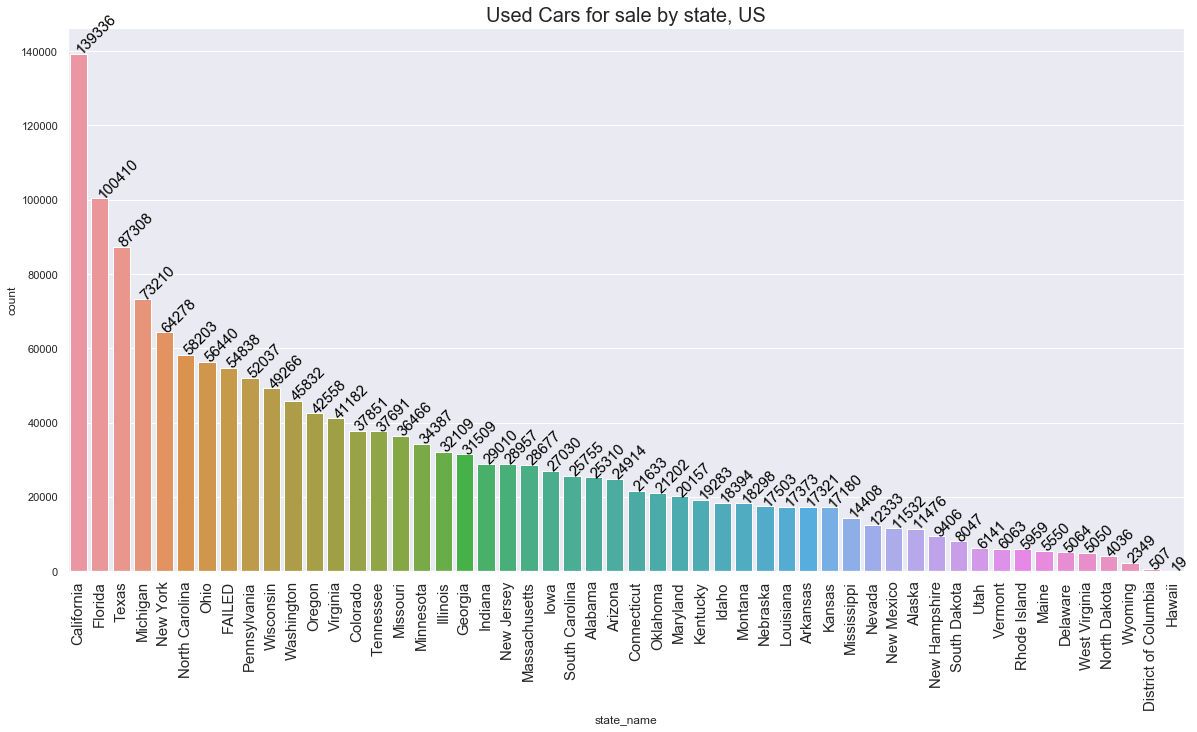

In [37]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='state_name',data=df,order=df['state_name'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=15);
ax.set_title("Used Cars for sale by state, US", fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black', rotation=45)

### Car manufacture years on sale 

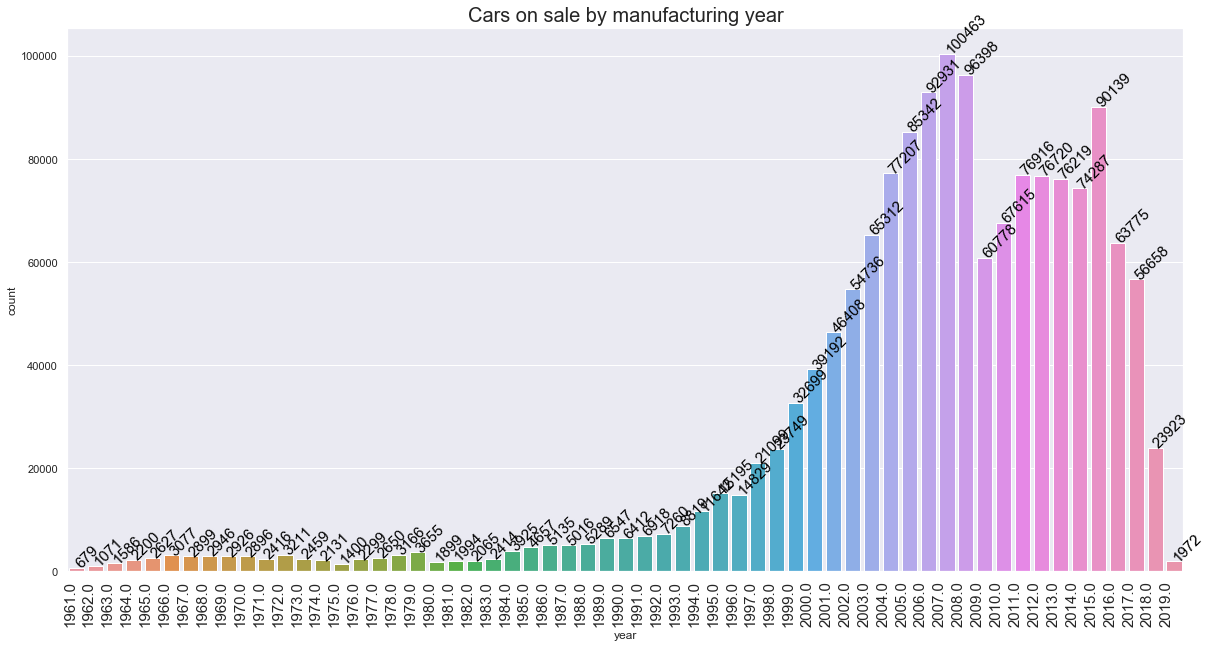

In [38]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='year',data=df,) #order=df.year.value_counts().iloc[:-50].index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Cars on sale by manufacturing year', fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black', rotation=45)

### Top car manufacturers

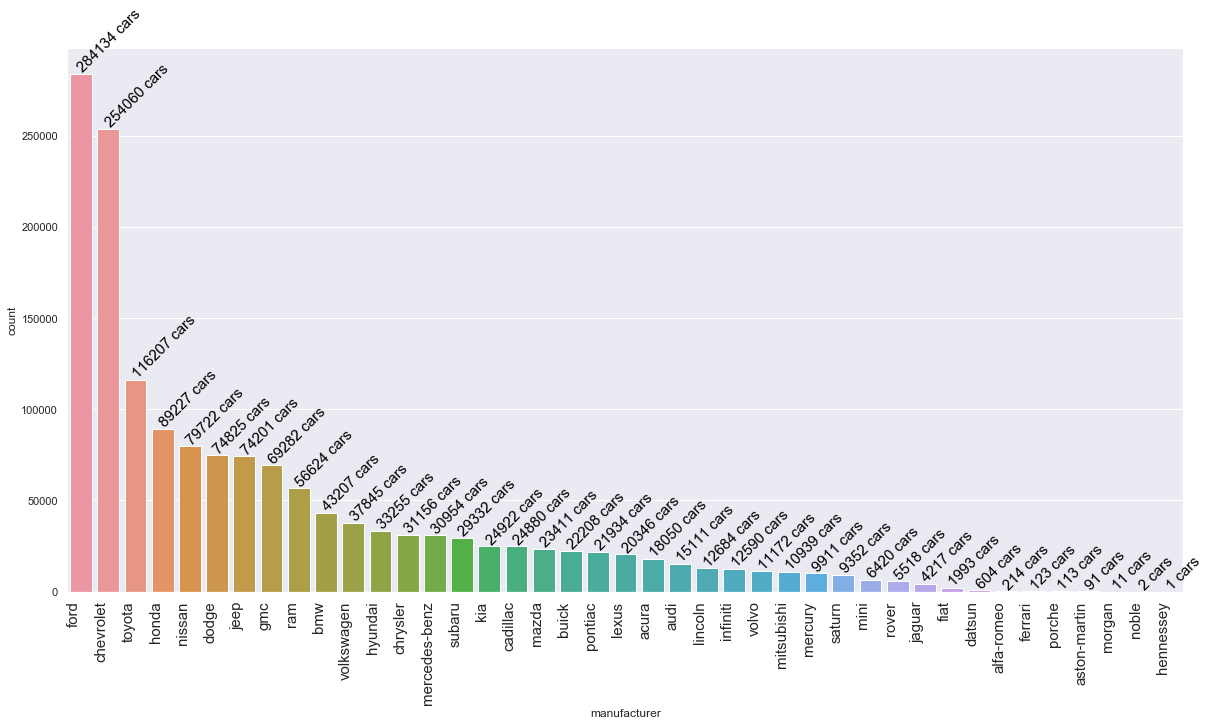

In [39]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='manufacturer',data=df, order=df.manufacturer.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);


# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+1000, \
            str(round((i.get_height()), 2))+' cars', fontsize=15, color='black', rotation=45)
    

In [40]:
df['manufacturer'].value_counts().head(10)

ford         284134
chevrolet    254060
toyota       116207
honda         89227
nissan        79722
dodge         74825
jeep          74201
gmc           69282
ram           56624
bmw           43207
Name: manufacturer, dtype: int64

### Car manufacturers avg price per car

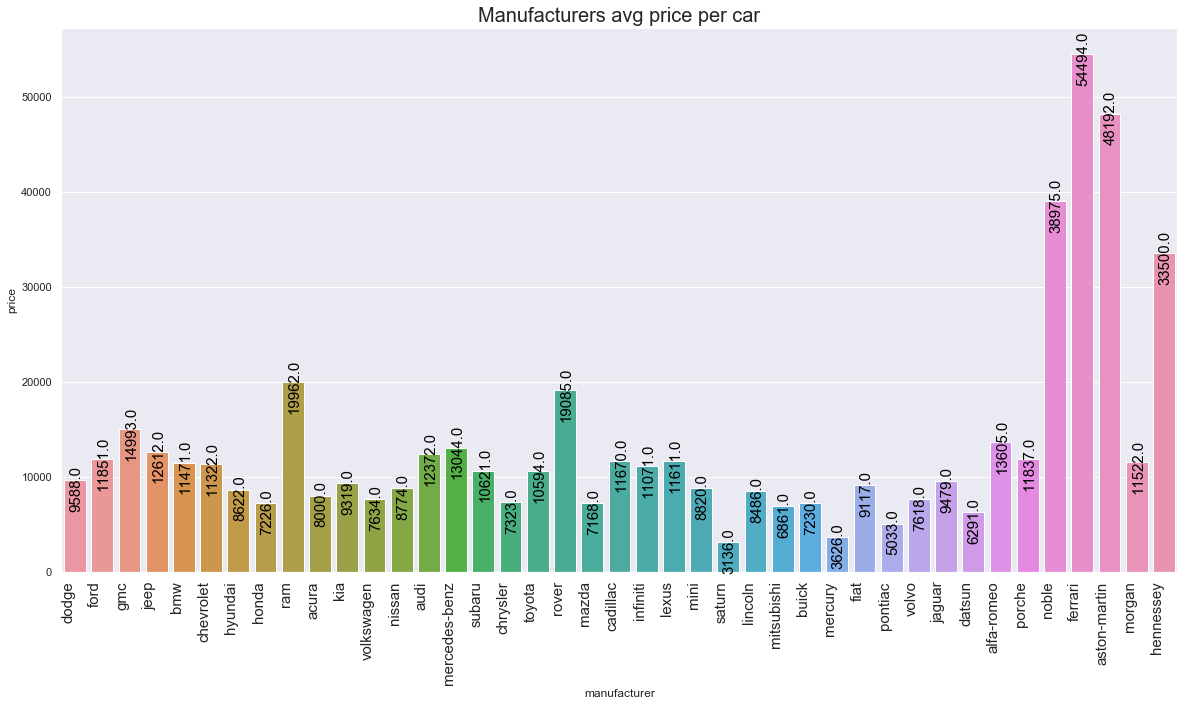

In [41]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='manufacturer', y='price', data=df,ci=None);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15,);
ax.set_title('Manufacturers avg price per car', fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()-3000, \
            str(round((i.get_height()),)), fontsize=15, color='black', rotation=90)
    

### Car avg price per car manufacturing year

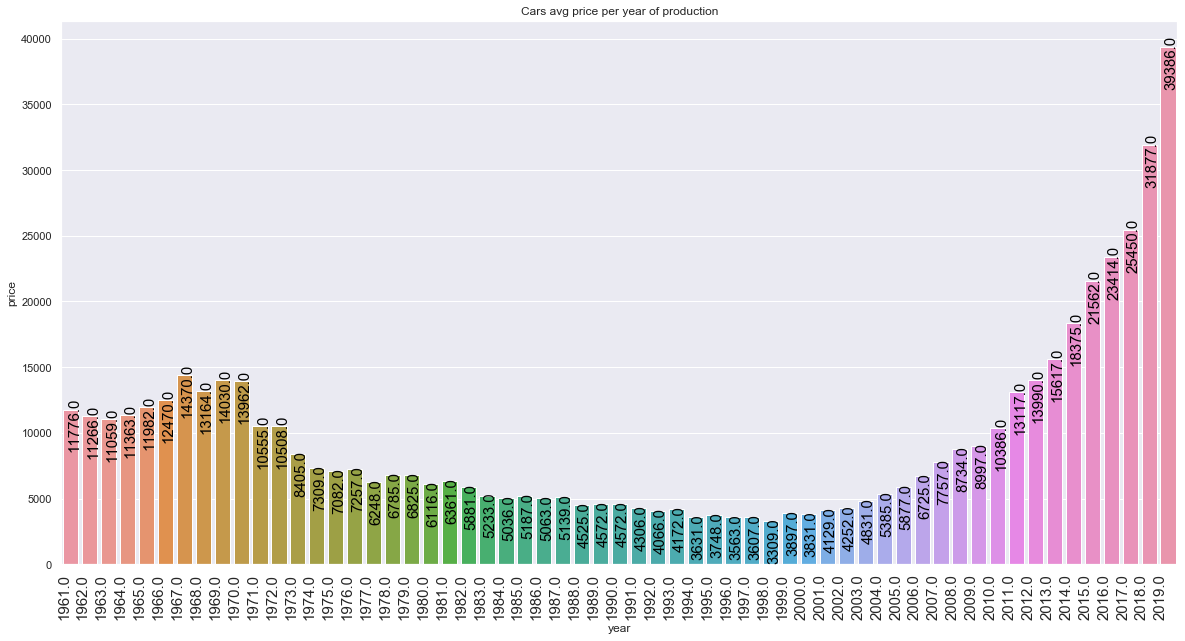

In [42]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='year', y='price', data=df,ci=None);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Cars avg price per year of production')

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()-3000, \
            str(round((i.get_height()),)), fontsize=15, color='black', rotation=90)

### Top car colours

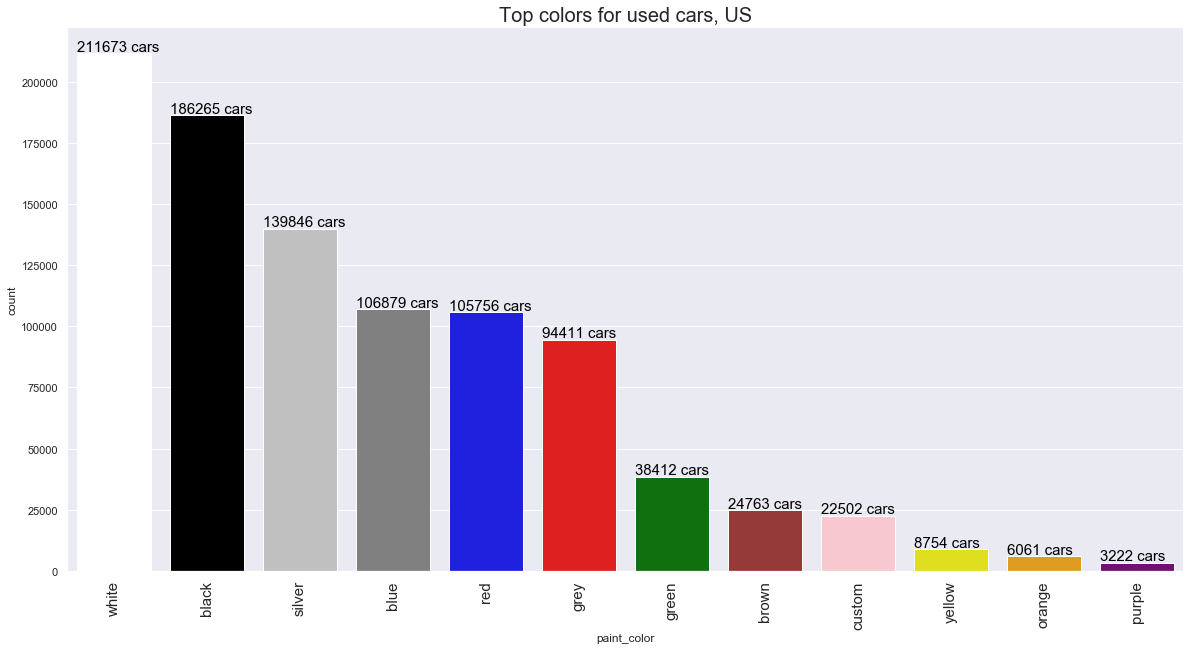

In [43]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='paint_color',data=df,order=df['paint_color'].value_counts().index, 
                   palette=["white", "black",'silver', 'grey', 'blue', 'red', 'green', 'brown','pink','yellow','orange','purple']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=15);
ax.set_title("Top colors for used cars, US", fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()), 2))+' cars', fontsize=15, color='black',)
                

### Avg prices per colors

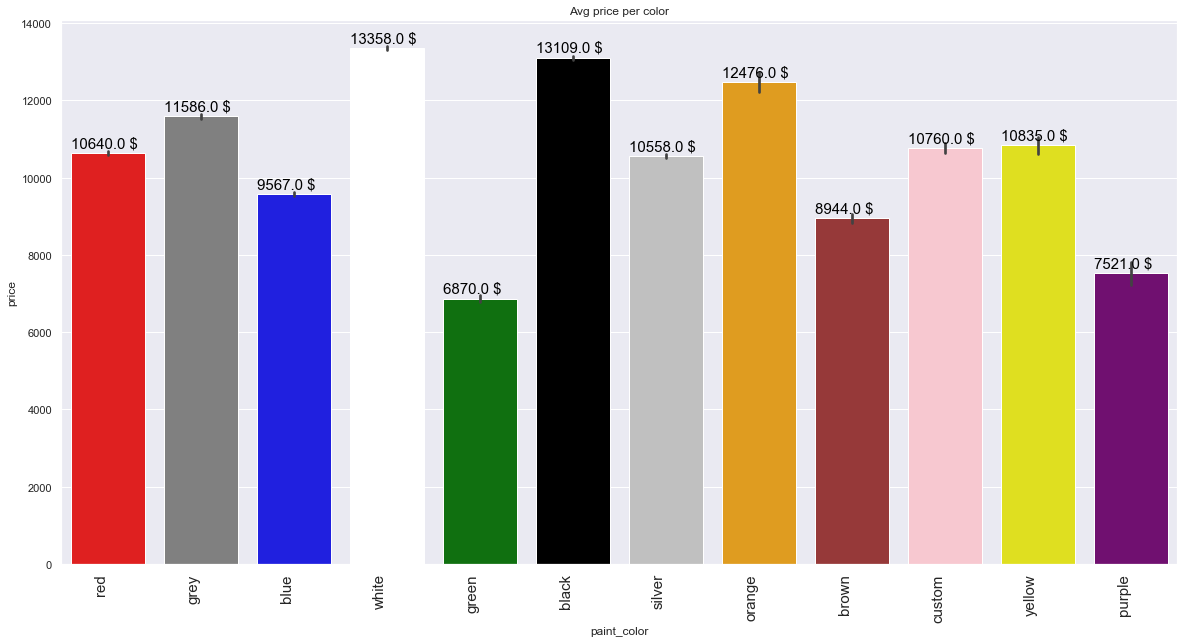

In [44]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='paint_color', y='price', data=df,
                palette=["red", "grey",'blue', 'white', 'green', 'black', 'silver', 'orange','brown','pink','yellow','purple']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Avg price per color')


# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+150, \
            str(round((i.get_height()),))+' $', fontsize=15, color='black',)

### Cars by transmission type

Text(0.5, 1.0, 'Cars by Transmission type')

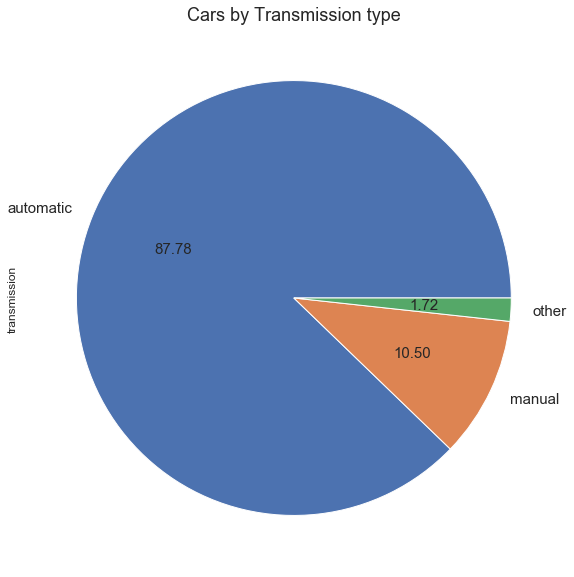

In [45]:
plt.figure(figsize=(20,10))
df['transmission'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Cars by Transmission type", fontsize=18 )

### Odometer data (In Miles)

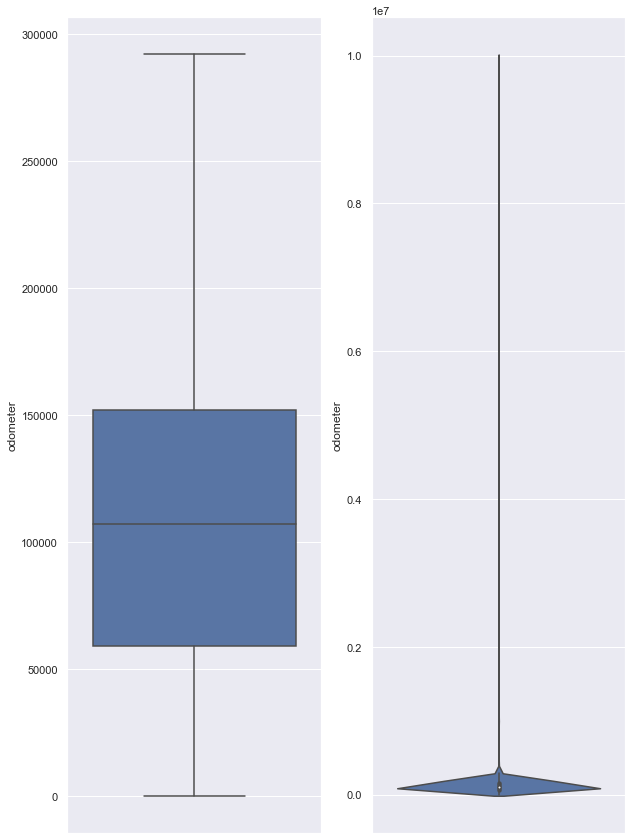

In [46]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
sns.boxplot(y='odometer', data=df, showfliers=False) # ) 
plt.subplot(1,2,2)
sns.violinplot(y='odometer', data=df, showfliers=False) #) 

### Feature Engineering Foreign vs American

In [47]:
americancars = ['dodge', 'chevrolet','ram','ford', 'chrysler', 'saturn', 'gmc', 'cadillac',  'lincoln', 'buick', 'mercury','jeep', ]    
    
def alocation(x):
    if x in americancars:
        return "Local"
    else:
        return 'Foreign'

In [48]:
df['Foreign vs Local'] = df['manufacturer'].apply(alocation)

Text(0.5, 1.0, 'Local cars % vs Foreign cars %')

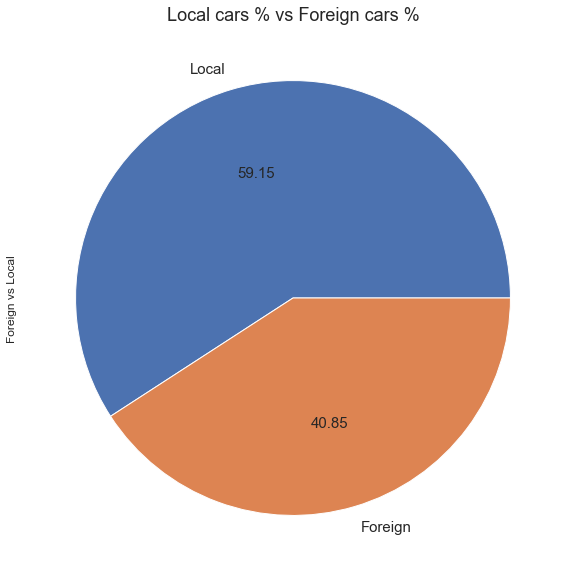

In [49]:
plt.figure(figsize=(20,10))
df['Foreign vs Local'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Local cars % vs Foreign cars %", fontsize=18 )

# Questions to answer

1. Plot dots of listing on a map, usint long/lat? -
2. Price range illustration using Boxplot? To see preliminary highs, lows and averages 
3. Illustarte cars count by cities (SNS.countplot)
3b. Cars by state?
4. Car manufacturing year counts/yaars (SNS countplot)
4b. Manufacturing year/avgs prices
5. Car count/manufacturer (sns.countplot)
6. Car manufacturer/average price
7. American vs Foreign cars/ by states.
8. Vehicles colour counts
9. Avg. vehicle prices per color?
10. Cars by gear type in %? Are automatic or Manual more popular?
11. Odometer statistics, averages? 



Missing data?+
Duplicates??+-
Corrupted Data?? +-
Outliers? Get rid of them and why? +
What features are existing?+
Can we engineer some data?+
Dates are good source, day of week, hours, months etc? (N/A)


Correlation between variables? Maybe some need to be excluded?
ML model will give a slight bonus (Which ML model to use for price prediction?) 

# Apply basic ML to predict car prices

In [50]:
#Choosing right features for price prediction
df.head()

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name,Foreign vs Local
0,marshall,11900,2010.0,dodge,6 cylinders,gas,43600.0,automatic,red,Lincoln,South Dakota,Local
2,marshall,17550,2008.0,ford,NaN,gas,NaN,automatic,NaN,Meade,South Dakota,Local
3,marshall,2800,2004.0,ford,6 cylinders,gas,168591.0,automatic,grey,Osceola,Iowa,Local
5,marshall,9900,2007.0,gmc,8 cylinders,gas,169000.0,automatic,NaN,Lincoln,South Dakota,Local
6,marshall,12500,2015.0,jeep,4 cylinders,gas,39500.0,automatic,grey,Minnehaha,South Dakota,Local


In [51]:
# features = ['year','manufacturer','fuel','odometer', 'transmission']

#### Removing instances where any of the values is missing in the selected features - because it's important in price prediction.

In [52]:
df.isnull().sum()

city                     0
price                    0
year                     0
manufacturer             0
cylinders           611759
fuel                  9864
odometer            472143
transmission          8443
paint_color         612304
county_name          54838
state_name               0
Foreign vs Local         0
dtype: int64

In [53]:
df = df.dropna(subset=['fuel','odometer','transmission'])
df.shape #762,552 still decent data size

(1074034, 12)

#### Turninig some categorical values to numericals with One Hot encoding

### Fuel

In [54]:
df['fuel'].unique()

array(['gas', 'diesel', 'electric', 'hybrid', 'other'], dtype=object)

In [55]:
#Drop others
df.drop( df[ df['fuel'] == 'other'].index , inplace=True)

In [56]:
df['fuel'].unique()

array(['gas', 'diesel', 'electric', 'hybrid'], dtype=object)

In [57]:
# Assign numerical values to 4 types (One Hot Encoding, using Pandas)
df['fuel'] = pd.Categorical(df['fuel'])

In [58]:
dfDummies = pd.get_dummies(df['fuel'], prefix = 'fuel')

In [59]:
dfDummies.head()

,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid
0,0,0,1,0
3,0,0,1,0
5,0,0,1,0
6,0,0,1,0
9,0,0,1,0


In [60]:
df = pd.concat([df, dfDummies], axis=1)
df.head()

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name,Foreign vs Local,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid
0,marshall,11900,2010.0,dodge,6 cylinders,gas,43600.0,automatic,red,Lincoln,South Dakota,Local,0,0,1,0
3,marshall,2800,2004.0,ford,6 cylinders,gas,168591.0,automatic,grey,Osceola,Iowa,Local,0,0,1,0
5,marshall,9900,2007.0,gmc,8 cylinders,gas,169000.0,automatic,NaN,Lincoln,South Dakota,Local,0,0,1,0
6,marshall,12500,2015.0,jeep,4 cylinders,gas,39500.0,automatic,grey,Minnehaha,South Dakota,Local,0,0,1,0
9,soo,12995,2003.0,ford,10 cylinders,gas,236000.0,automatic,blue,NaN,FAILED,Local,0,0,1,0


### Transmission

In [61]:
#drop instances with value - Other
#Turn automatic - 1, Manual - 2
df['transmission'].unique()

array(['automatic', 'other', 'manual'], dtype=object)

In [62]:
#Drop other
df.drop( df[ df['transmission'] == 'other'].index , inplace=True)

In [63]:
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [64]:
df['transmission'] = pd.Categorical(df['transmission'])
dfDummies2 = pd.get_dummies(df['transmission'], prefix = 'transmission')
df = pd.concat([df, dfDummies2], axis=1)
df.head()

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name,Foreign vs Local,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,transmission_automatic,transmission_manual
0,marshall,11900,2010.0,dodge,6 cylinders,gas,43600.0,automatic,red,Lincoln,South Dakota,Local,0,0,1,0,1,0
3,marshall,2800,2004.0,ford,6 cylinders,gas,168591.0,automatic,grey,Osceola,Iowa,Local,0,0,1,0,1,0
5,marshall,9900,2007.0,gmc,8 cylinders,gas,169000.0,automatic,NaN,Lincoln,South Dakota,Local,0,0,1,0,1,0
6,marshall,12500,2015.0,jeep,4 cylinders,gas,39500.0,automatic,grey,Minnehaha,South Dakota,Local,0,0,1,0,1,0
9,soo,12995,2003.0,ford,10 cylinders,gas,236000.0,automatic,blue,NaN,FAILED,Local,0,0,1,0,1,0


### Cylinders

In [65]:
#df['cylinders'] = df['cylinders'].map(lambda x: x.rstrip('cylinders'))
#df.head()

In [66]:
#df['cylinders'].unique()

In [67]:
#df.drop( df[ df['cylinders'] == 'oth'].index , inplace=True)

In [68]:
#df['cylinders'].unique()

In [69]:
#df['cylinders'] = df['cylinders'].astype(int)

#### Manufacturers

In [70]:
#A lot of variations? 
#df['manufacturer'].unique()

In [71]:
#df['manufacturer'] = pd.Categorical(df['manufacturer'])
#dfDummies3 = pd.get_dummies(df['manufacturer'], prefix = 'make')
#df = pd.concat([df, dfDummies3], axis=1)

In [72]:
df = df[df['manufacturer'] == 'ford']

In [73]:
df.shape

(182421, 18)

In [115]:
#'make_acura','make_alfa-romeo','make_aston-martin','make_audi','make_bmw','make_buick',
            #'make_cadillac','make_chevrolet','make_chrysler','make_datsun','make_dodge','make_ferrari',
            #'make_fiat','make_ford','make_gmc','make_hennessey','make_honda','make_hyundai','make_infiniti',
            #'make_jaguar','make_jeep','make_kia','make_lexus','make_lincoln','make_mazda','make_mercedes-benz',
            #'make_mercury','make_mini','make_mitsubishi','make_morgan','make_nissan','make_noble','make_pontiac',
            #'make_porche','make_ram','make_rover','make_saturn','make_subaru','make_toyota','make_volkswagen', 'make_volvo'
#'fuel_diesel','fuel_electric', 'fuel_gas', 'fuel_hybrid','transmission_automatic', 'transmission_manual',

features = ['year','odometer' ]
X = df[features]

In [116]:
#Price is piece we expect to predict
y = df['price']

In [117]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1) 

In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

In [127]:
knn.fit(train_X,train_y)
predictions = knn.predict(test_X)
knn.score(test_X, test_y)
#shows low score, but we don't expect high, as 100% accuracy in price doesnt matter, matters close one.

0.23325878173924483

In [128]:
testdf = pd.concat([test_X, test_y], axis=1)
testdf.head(10)

,year,odometer,price
181624,1996.0,323997.0,12500
567776,2009.0,95756.0,11295
1014265,2007.0,177000.0,1100
11620,2003.0,152661.0,5250
470937,2004.0,115364.0,7490
1631852,2016.0,48668.0,23495
1419120,2011.0,230700.0,14995
646937,2005.0,159.0,1980
1687715,2004.0,123000.0,2000
854142,2001.0,117674.0,700


In [129]:
knn.predict([[1996.0,323997.0]])

array([12500], dtype=int64)

In [130]:
knn.predict([[2009.0,95756.0]])

array([10995], dtype=int64)

In [131]:
knn.predict([[2007.0,177000.0]])

array([4800], dtype=int64)

In [111]:
knn.predict([[2003.0	152661.0]])

array([300], dtype=int64)

In [114]:
knn.predict([[2011.0,230700.0,0,0,1,0,1,0]])

array([14995], dtype=int64)